## Building a Regression MLP Using the Sequential API

In [1]:
import sklearn
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

print(f"Scikit-learn: {sklearn.__version__}")
print(f"Tensorflow: {tf.__version__}")
print(f"Keras: {keras.__version__}")


Scikit-learn: 1.3.0
Tensorflow: 2.15.0
Keras: 2.15.0


In [2]:
housing = fetch_california_housing()
housing.data.shape

(20640, 8)

In [3]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
pd.DataFrame(housing.data, columns=housing.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
print(X_train_full.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
print(X_train.shape)
print(X_valid.shape)

(11610, 8)
(3870, 8)


In [7]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_valid_scaled = scaler.transform(X_valid)
#X_test_scaled = scaler.transform(X_test)

norm_layer = keras.layers.Normalization(input_shape=X_train.shape[1:])
norm_layer.adapt(X_train)

### Creating the Model Using the Sequential API

Building, training, evaluating and using a regression MLP using the Sequential API to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error.

In [8]:
model = keras.models.Sequential([
    norm_layer,
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5618 (21.95 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 17 (72.00 Byte)
____________________

Another way to display the model's architecture

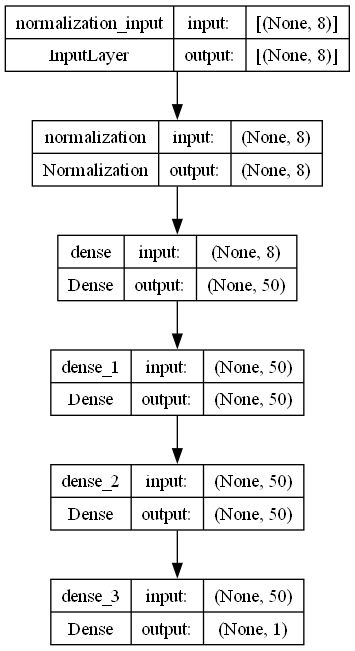

In [9]:
keras.utils.plot_model(model, "mlp_fmnist_regressor.png", show_shapes=True)

 ### Compiling the Model

In [10]:
model.compile(loss="mse", optimizer="sgd", metrics=['RootMeanSquaredError'])

###  Training and Evaluating the Model

In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


363/363 [==============================] - 2s 3ms/step - loss: 1.0231 - root_mean_squared_error: 1.0115 - val_loss: 0.4638 - val_root_mean_squared_error: 0.6811
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4412 - root_mean_squared_error: 0.6642 - val_loss: 0.4883 - val_root_mean_squared_error: 0.6988
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3911 - root_mean_squared_error: 0.6254 - val_loss: 0.3630 - val_root_mean_squared_error: 0.6025
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3744 - root_mean_squared_error: 0.6119 - val_loss: 0.8253 - val_root_mean_squared_error: 0.9084
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3816 - root_mean_squared_error: 0.6177 - val_loss: 4.0498 - val_root_mean_squared_error: 2.0124
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3864 - root_mean_squared_error: 0.6216 - val_loss: 4.0969 - va

In [12]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3049 - root_mean_squared_error: 0.5521


[0.3048500120639801, 0.552132248878479]

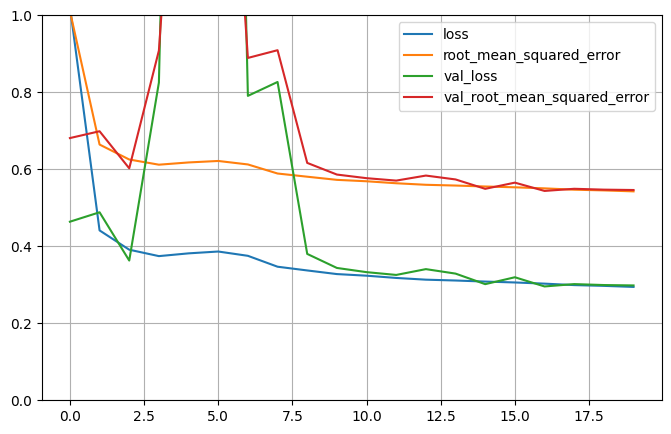

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Using the Model to Make Predictions

In [14]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 109ms/step
[[0.6609118]
 [1.1852217]
 [4.7412186]]
[0.477   0.458   5.00001]


## Building a Regression MLP Using the Functional API

Wide & Deep neural network. It connects all or part of the inputs directly to the output layer, as shown in Figure 10-13. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations

### Creating the Model Using the Functional API

In [34]:
input = keras.layers.Input(shape=X_train.shape[1:])
norm_input = norm_layer(input)
hidden1 = keras.layers.Dense(50, activation="relu")(norm_input)
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu")(hidden2)
#concat = keras.layers.concatenate([norm_input, hidden3])
concat = keras.layers.concatenate([hidden3])
output = keras.layers.Dense(1)(concat)

func_model = keras.models.Model(inputs=[input], outputs=[output])
func_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 8)]               0         
                                                                 
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense_34 (Dense)            (None, 50)                450       
                                                                 
 dense_35 (Dense)            (None, 50)                2550      
                                                                 
 dense_36 (Dense)            (None, 50)                2550      
                                                                 
 concatenate_6 (Concatenate  (None, 50)                0         
 )                                                         

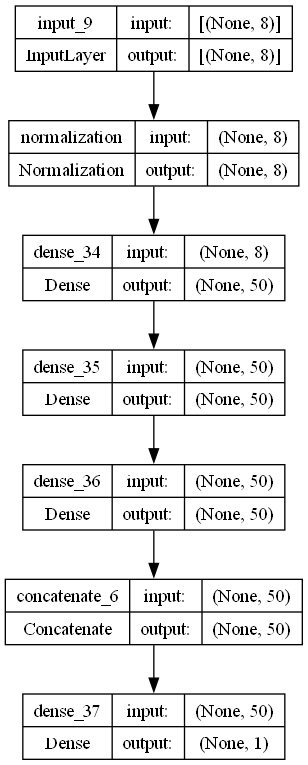

In [35]:
keras.utils.plot_model(func_model, "mlp_fmnist_regressor_functional.png", show_shapes=True)

In [40]:
func_model.compile(loss="mse", optimizer="sgd", metrics=['RootMeanSquaredError'])

In [41]:
func_history = func_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2704 - root_mean_squared_error: 0.5200 - val_loss: 0.2915 - val_root_mean_squared_error: 0.5399
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2700 - root_mean_squared_error: 0.5196 - val_loss: 0.2704 - val_root_mean_squared_error: 0.5200
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2679 - root_mean_squared_error: 0.5176 - val_loss: 0.3006 - val_root_mean_squared_error: 0.5483
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2680 - root_mean_squared_error: 0.5177 - val_loss: 0.2685 - val_root_mean_squared_error: 0.5182
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2662 - root_mean_squared_error: 0.5159 - val_loss: 0.2681 - val_root_mean_squared_error: 0.5177
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2658 - root_mean_squared_error: 0.5155 - val_loss: 0.2869 - val_

In [42]:
func_model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2948 - root_mean_squared_error: 0.5429


[0.294765442609787, 0.5429230332374573]

But what if you want to send a subset of the features through the wide path, and a  different subset (possibly overlapping) through the deep path (see Figure 10-14)? In this case, one solution is to use multiple inputs.

In [ ]:
inputA = keras.layers.Input(shape=[5])
inputB = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(50, activation="relu")(inputB)
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
concat = keras.layers.Concatenate()[inputA, hidden2]
output = keras.layers.Dense(1)(concat)

mi_model = keras.models.Model(inputs=[inputA, inputB], output=[output])
mi_model.summary()

In [ ]:
keras.utils.plot_model(mi_model, "mlp_fmnist_regressor_functional_multiple_input.png", show_shapes=True)

There are also many use cases in which you may want to have multiple outputs:

1. The task may demand it, for example you may want to locate and classify the  main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.

In [ ]:
inputA = keras.layers.Input(shape=[5])
inputB = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(50, activation="relu")(inputB)
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
concat = keras.layers.Concatenate()[inputA, hidden2]
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)

mo_model = keras.models.Model(inputs=[inputA, inputB], outputs=[output, aux_output])
mo_model.summary()

In [ ]:
keras.utils.plot_model(mo_model, "mlp_fmnist_regressor_functional_multiple_output.png", show_shapes=True)

##  Building Dynamic Models Using the Subclassing API

Simply subclass the Model class, create the layers you need in the constructor, and use them to perform the computations you want in the call() method.  For example, creating an instance of the following WideAndDeepModel class gives us an equivalent model to the one we just built with the Functional API.

In [ ]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        inputA, inputB = inputs
        hidden1 = self.hidden1(inputB)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()[inputA, hidden2]
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

sub_model = WideAndDeepModel()